In [1]:
import genophenocorr
import hpotk
from IPython.display import display, HTML
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

/Users/robin/PycharmProjects/genophenocorr/gpc_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Loaded HPO v2023-10-09
Using genophenocorr version 0.1.1dev


In [2]:
ANKRD11_id = 'NM_013275.6' # MANE select
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder

fpath_phenopackets = r'phenopackets'
cohort_creator = configure_caching_cohort_creator(hpo, timeout=20)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)


Patients Created: 100%|██████████| 337/337 [00:00<00:00, 457.34it/s]
Validated under none policy
Showing errors and warnings
337 phenopacket(s) found at `phenopackets`
  patient #0
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient Novara, 2017_P2[PMID_36446582_Novara_2017_P2]. Remove variant from testing
     ·Patient PMID_36446582_Novara_2017_P2 has no variants to work with
  patient #1
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient Goldenberg2016_P13[PMID_36446582_Goldenberg2016_P13]. Remove variant from testing
     ·Patient PMID_36446582_Goldenberg2016_P13 has no variants to work with
  patient #3
    variants
     warnings:
     ·Expected a VCF record, a VRS CNV, or an expression with `hgvs.c` but had an error retrieving any from patient Ockeloen2015_P20[PMID_36446582_Ockeloen2015_P20]. Remove

In [3]:
protein_id = 'NP_001027558.1'
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate(protein_id)

from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService





In [4]:
txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(ANKRD11_id)
protein_id = 'NP_037407.4' 
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate(protein_id)

In [5]:
from genophenocorr.view import ProteinVisualizable
protein_meta = protein_metas[0]
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)

start  799  end  801
start  460  end  462
start  1962  end  1963
start  1509  end  1510
start  2511  end  2512
start  634  end  636
start  634  end  636
start  1065  end  1067
start  634  end  636
start  634  end  636
start  634  end  636
start  1457  end  1459
start  837  end  838
start  1064  end  1065
start  802  end  804
start  724  end  726
start  1257  end  1259
start  1829  end  1830
start  1745  end  1747
start  2393  end  2394
start  634  end  636
start  2230  end  2231
start  802  end  804
start  1014  end  1015
start  634  end  636
start  1499  end  1500
start  634  end  636
start  288  end  289
start  2454  end  2455
start  1827  end  1828
start  634  end  636
start  439  end  440
start  864  end  865
start  460  end  462
start  634  end  636
start  460  end  462
start  1074  end  1076
start  1468  end  1469
start  732  end  733
start  1392  end  1397
start  2233  end  2234
start  802  end  804
start  802  end  804
start  802  end  804
start  799  end  801
start  2397  end 

Warning need to implement protein_length
1000.0
type <class 'numpy.ndarray'> 
type max_x_absolute <class 'int'> 
type <class 'numpy.ndarray'> 
type max_x_absolute <class 'int'> 
type <class 'numpy.ndarray'> 
type max_x_absolute <class 'int'> 
Drawing at marker =  0.16794205052005942
Drawing at marker =  0.19342496285289745
Drawing at marker =  0.19472511144130755
Drawing at marker =  0.19706537890044576
Drawing at marker =  0.2215081723625557
Drawing at marker =  0.22462852897473995
Drawing at marker =  0.2287890044576523
Drawing at marker =  0.24673105497771175
Drawing at marker =  0.2511515601783061
Drawing at marker =  0.26103268945022284
Drawing at marker =  0.2638930163447251
Drawing at marker =  0.26805349182763744
Drawing at marker =  0.26935364041604754
Drawing at marker =  0.26961367013372955
Drawing at marker =  0.2698736998514116
Drawing at marker =  0.2758543833580981
Drawing at marker =  0.2761144130757801
Drawing at marker =  0.29795690936106983
Drawing at marker =  0.299

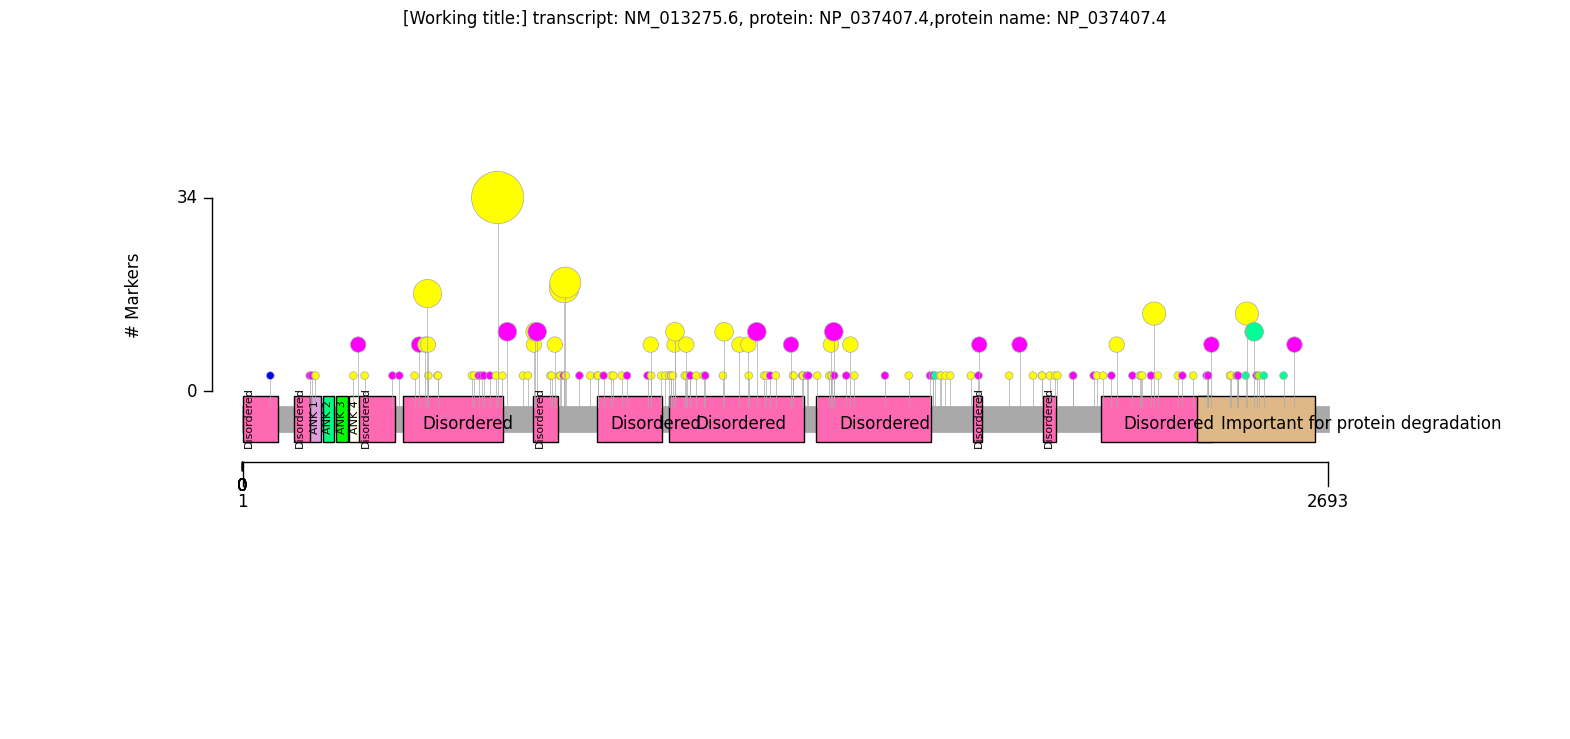

In [6]:
from genophenocorr.view import VariantDrawer
drawer = VariantDrawer()
drawer.draw_fig(pvis=pvis)

In [7]:
import numpy as np
variant_locations_counted_absolute, marker_counts = np.unique(variant_locations, axis=0, return_counts=True)

NameError: name 'variant_locations' is not defined